In [18]:
import pandas as pd
import os

In [20]:
!ls

R                   json                not_in_use          transcripts_csv_3
README.md           metadata            notebooks
concat_p            neurosky_polar_data sep_transcripts
emotion_annotations new_eeg             test.csvs


In [ ]:
os.chdir('../')

In [14]:
count = 1
directory = 'neurosky_polar_data'
df = pd.DataFrame()
for num in sorted(os.listdir(directory)):
    p = os.path.join(directory, num)
    #print(num)
    for eeg in os.listdir(p):
        #print(eeg)
        if 'Brain' in eeg:
            os.chdir(p)
            read = pd.read_csv(eeg)
            os.chdir('../../')
    #print(read)
    #print(read.iloc[:, 0].astype)
#             df = pd.DataFrame()
            
#             #read1 = read.iloc()
            
#             newcol = [0]
            
#             for i in read.iloc():
#                 newcol = [0]
                
#                 print(i[0])
#                 print(i[0])
#                 #print(read['timestamp'])
                
#                 #break
            read['new_timestamp'] = read['timestamp'].shift(1)
            read['new_timestamp'] = read['new_timestamp'].fillna(0)
    
            read['trans_time'] = (read['timestamp'] - read['new_timestamp'])/1000
            read['trans_time'].iloc()[0] = 0
            #print(read['trans_time'].iloc()[0])
            #read['sum'] = read['trans_time'].value.cumsum()
            for i in read.iloc[:, -1]:
                #print(i)
                read['new_trans_time'] = read['trans_time'].cumsum()
                #print(read)
                df = pd.DataFrame()
                df=pd.concat([df, read])
                #print(df)
                
            
            
                    
            df['new_trans_time'] = df['new_trans_time'].round(3)
            
            os.chdir('new_eeg')
            df.to_csv(f'BrainWave_p{count}a.csv', sep = ',', index = False)
            count+=1
            os.chdir('../')


            
    
    
    

In [6]:
read2 = pd.read_csv('BrainWave_new.csv')

In [10]:
read2['new_trans_time'] = read2['new_trans_time'].round(3)

In [12]:
read2.to_csv('BrainWave_newnew.csv', sep=',', index = False)

In [15]:
import numpy as np
import pandas as pd 
import mne
import scipy

Creating RawArray with float64 data, n_channels=8, n_times=1567
    Range : 0 ... 1566 =      0.000 ...    12.528 secs
Ready.
Using matplotlib as 2D backend.
Opening raw-browser...


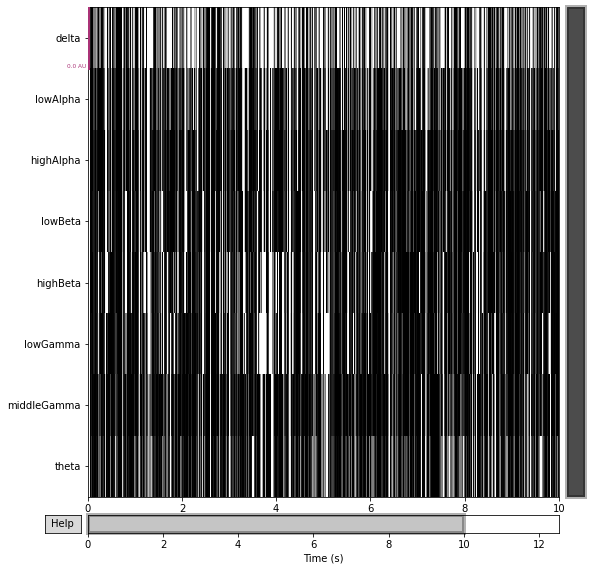

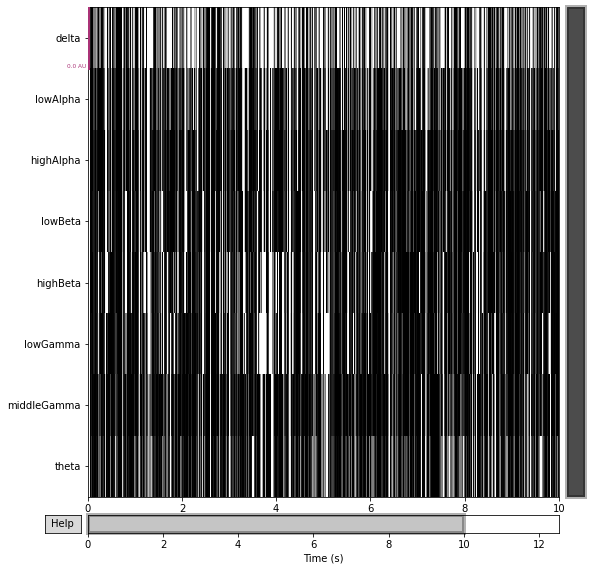

In [16]:
path = 'neurosky_polar_data/1/'
data = pd.read_csv(path + 'BrainWave.csv', 
                   skiprows=0, usecols=[*range(0, 8)]) 
ch_names = ['delta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'middleGamma', 'theta']

sfreq = 125 
info = mne.create_info(ch_names = ch_names, sfreq = sfreq)
raw = mne.io.RawArray(data.transpose(), info)
raw.plot()

Effective window size : 12.536 (s)


/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_75936/528833498.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=10, picks='all')


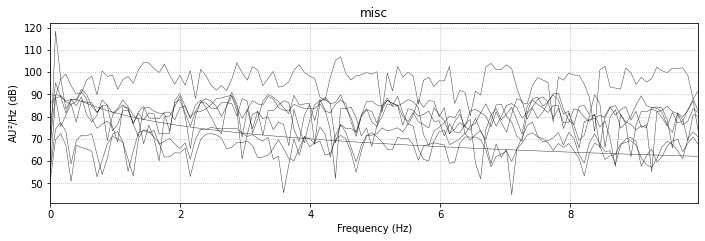

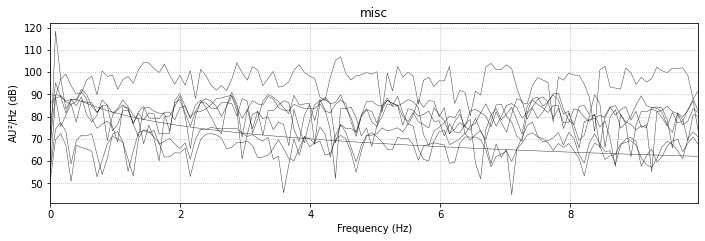

In [17]:
raw.plot_psd(fmax=10, picks='all')